In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import .csv
df = pd.read_csv("dataframe_voor_analyse3.csv")
df = df.drop("Unnamed: 0", axis=1)

In [4]:
# df.head() to get info about the columns at first sight (Display the first 5 rows)
df.head()

,Number,Dn,Ur,Keyword,Kd,keyword_density_percentage,HeaderCount,ListsCount,InternalLinksSoup,ExternalLinksSoup,...,CLS,original_publication,last_modified,days_between,MetaTitleExists,MetaDescriptionExists,KeyWordInMetaTitle,KeyWordInMetaDescription,KeyWordInUrl,KeyWordInImageTags
0,0.0,bouwmaat.nl,https://www.bouwmaat.nl/bouwmaterialen,bouwmaterialen,84.13,0.46,4.0,31.0,NaN,NaN,...,80.0,2021-05-20,2021-05-20,0.0,1,1,1,1,1,0
1,1.0,hornbach.nl,https://www.hornbach.nl/shop/Bouwmateriaal/S44...,bouwmaterialen,84.13,0.73,10.0,17.0,216.0,7.0,...,65.0,2020-01-01,2020-01-01,0.0,1,1,1,0,0,0
2,2.0,bouwbestel.nl,https://www.bouwbestel.nl/bouwmaterialen.html,bouwmaterialen,84.13,0.28,2.0,7.0,2595.0,14.0,...,3.0,2007-01-01,2021-01-01,5114.0,1,1,1,1,1,0
3,3.0,online-bouwmaterialen.nl,https://www.online-bouwmaterialen.nl/,bouwmaterialen,84.13,1.19,3.0,31.0,138.0,10.0,...,1.0,2011-01-01,2011-01-01,0.0,1,1,1,1,1,1
4,4.0,bmn.nl,https://www.bmn.nl/,bouwmaterialen,84.13,0.24,3.0,12.0,563.0,5.0,...,1.0,2021-01-01,2021-01-01,0.0,1,1,1,1,0,1


In [5]:
# df.info() - Display all column(s info)
df.info()

# Bijzonderheden:
#
#
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number                      99 non-null     float64
 1   Dn                          99 non-null     object 
 2   Ur                          99 non-null     object 
 3   Keyword                     99 non-null     object 
 4   Kd                          99 non-null     float64
 5   keyword_density_percentage  95 non-null     float64
 6   HeaderCount                 97 non-null     float64
 7   ListsCount                  93 non-null     float64
 8   InternalLinksSoup           96 non-null     float64
 9   ExternalLinksSoup           96 non-null     float64
 10  InternalLinksSEMrush        76 non-null     float64
 11  ExternalLinksSEMrush        78 non-null     float64
 12  BacklinksSEMrush            97 non-null     float64
 13  PageAScore                  98 non-nu

In [6]:
# Count difference in days
today = datetime.today().strftime('%Y-%m-%d')
today = pd.to_datetime(today, format='%Y-%m-%d')
df['last_modified'] = pd.to_datetime(df['last_modified'], format='%Y-%m-%d')

df['daysOld'] =  today - df['last_modified']
df['daysOld'] = df['daysOld'] / np.timedelta64(1, 'D')


In [7]:
# df.describe() - Display count, min, max, mean etc...
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number,99.0,4.900000e+01,2.872281e+01,0.00,24.500,49.00,73.500,9.800000e+01
Kd,99.0,8.413000e+01,8.569905e-14,84.13,84.130,84.13,84.130,8.413000e+01
keyword_density_percentage,95.0,1.450526e+00,1.347851e+00,0.00,0.425,1.01,2.245,7.140000e+00
HeaderCount,97.0,3.886598e+00,2.344658e+00,0.00,2.000,4.00,5.000,1.100000e+01
ListsCount,93.0,1.096774e+01,9.316245e+00,0.00,5.000,8.00,14.000,5.200000e+01
InternalLinksSoup,96.0,2.145417e+02,3.591088e+02,0.00,36.250,102.00,215.250,2.595000e+03
ExternalLinksSoup,96.0,1.140625e+01,2.847550e+01,0.00,2.000,5.00,10.000,1.960000e+02
InternalLinksSEMrush,76.0,6.701316e+01,1.055332e+02,0.00,14.000,42.00,61.000,7.710000e+02
ExternalLinksSEMrush,78.0,1.593718e+02,6.501448e+02,0.00,11.000,79.00,104.500,5.752000e+03
BacklinksSEMrush,97.0,1.145875e+07,7.093394e+07,2.00,54.000,375.00,30760.000,5.660787e+08


In [8]:
# Extra variable to save the correlations
corrdata = df.corr()

<AxesSubplot:>

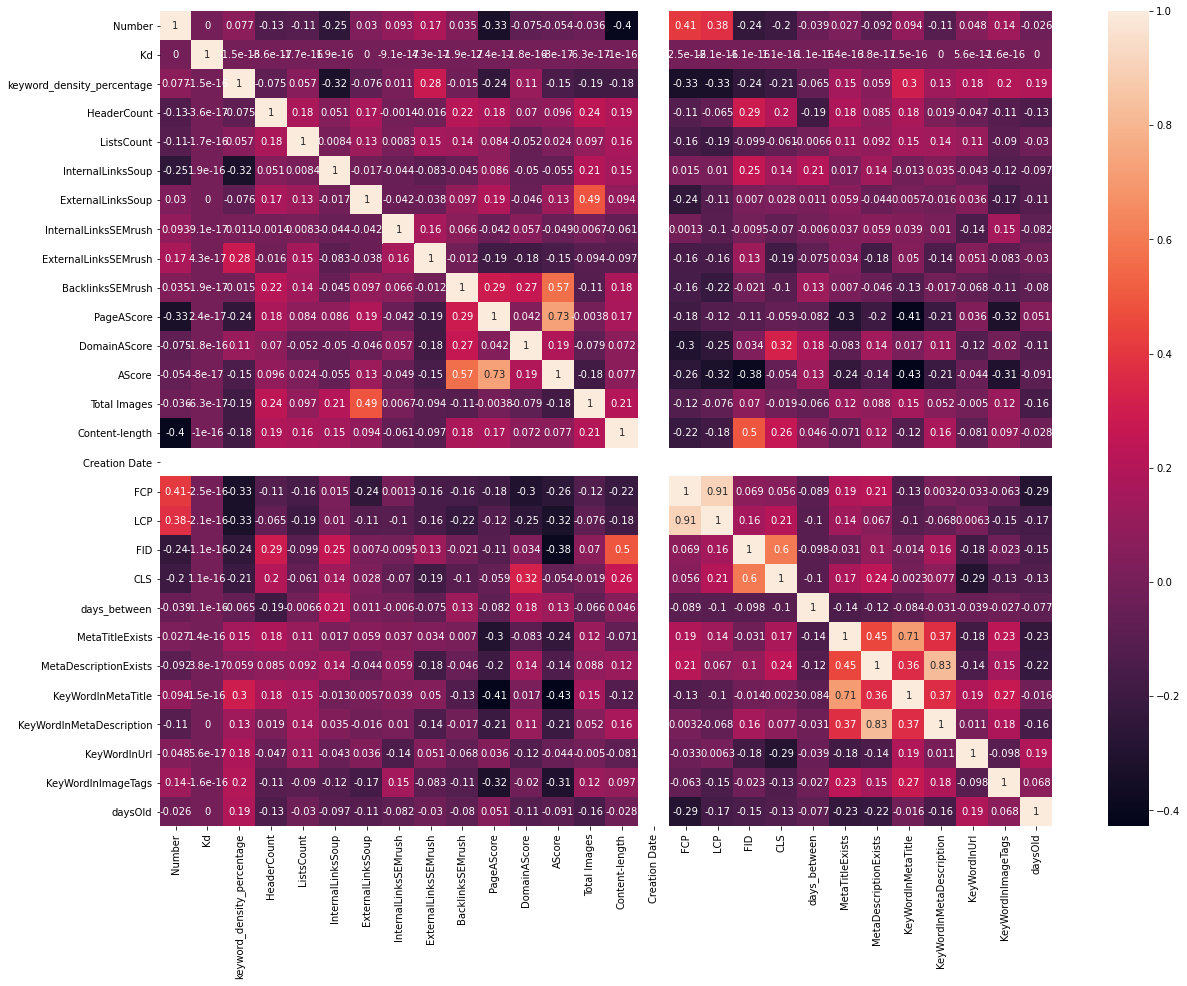

In [85]:
# Visualize the correlations with a sns heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(corrdata, annot=True)

In [9]:
# Get only numerical values
numericalData = df.select_dtypes(include='number').values

In [10]:
df2 = df.drop(columns=['original_publication','last_modified','Keyword','Dn', 'Ur','ImageTags','METATitle','METADescription'])
df2.columns.tolist()

['Number',
 'Kd',
 'keyword_density_percentage',
 'HeaderCount',
 'ListsCount',
 'InternalLinksSoup',
 'ExternalLinksSoup',
 'InternalLinksSEMrush',
 'ExternalLinksSEMrush',
 'BacklinksSEMrush',
 'PageAScore',
 'DomainAScore',
 'AScore',
 'Total Images',
 'Content-length',
 'Creation Date',
 'FCP',
 'LCP',
 'FID',
 'CLS',
 'days_between',
 'MetaTitleExists',
 'MetaDescriptionExists',
 'KeyWordInMetaTitle',
 'KeyWordInMetaDescription',
 'KeyWordInUrl',
 'KeyWordInImageTags',
 'daysOld']

In [11]:
# Standardize the data attributes
x = df2.values #returns a numpy array #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfNormalized = pd.DataFrame(x_scaled, columns=df2.columns)

dfNormalized

,Number,Kd,keyword_density_percentage,HeaderCount,ListsCount,InternalLinksSoup,ExternalLinksSoup,InternalLinksSEMrush,ExternalLinksSEMrush,BacklinksSEMrush,...,FID,CLS,days_between,MetaTitleExists,MetaDescriptionExists,KeyWordInMetaTitle,KeyWordInMetaDescription,KeyWordInUrl,KeyWordInImageTags,daysOld
0,0.000000,0.0,0.064426,0.363636,0.596154,NaN,NaN,0.055772,0.013387,4.764885e-05,...,0.157895,0.860215,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.000000
1,0.010204,0.0,0.102241,0.909091,0.326923,0.083237,0.035714,0.054475,0.013734,2.668710e-05,...,0.105263,0.698925,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.064661
2,0.020408,0.0,0.039216,0.181818,0.134615,1.000000,0.071429,0.166018,0.003303,2.724003e-05,...,0.052632,0.032258,0.933552,1.0,1.0,1.0,1.0,1.0,0.0,0.017798
3,0.030612,0.0,0.166667,0.272727,0.596154,0.053179,0.051020,0.002594,0.000348,1.271908e-07,...,0.052632,0.010753,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.485531
4,0.040816,0.0,0.033613,0.272727,0.230769,0.216956,0.025510,0.194553,0.030946,9.226633e-06,...,0.157895,0.010753,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.017798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.959184,0.0,0.627451,0.272727,0.480769,0.005395,0.020408,0.251621,1.000000,1.413231e-08,...,NaN,NaN,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.017798
95,0.969388,0.0,0.355742,0.181818,0.134615,0.005780,0.015306,NaN,0.017907,9.186002e-08,...,NaN,NaN,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.248656
96,0.979592,0.0,0.313725,0.090909,0.096154,0.020424,0.025510,0.016861,0.017385,3.833389e-07,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,NaN
97,0.989796,0.0,0.158263,0.272727,0.173077,0.024277,0.066327,0.345006,0.002434,1.427717e-05,...,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,NaN


In [12]:
# Extra variable to save the correlations
corrdata2 = dfNormalized.corr()

<AxesSubplot:>

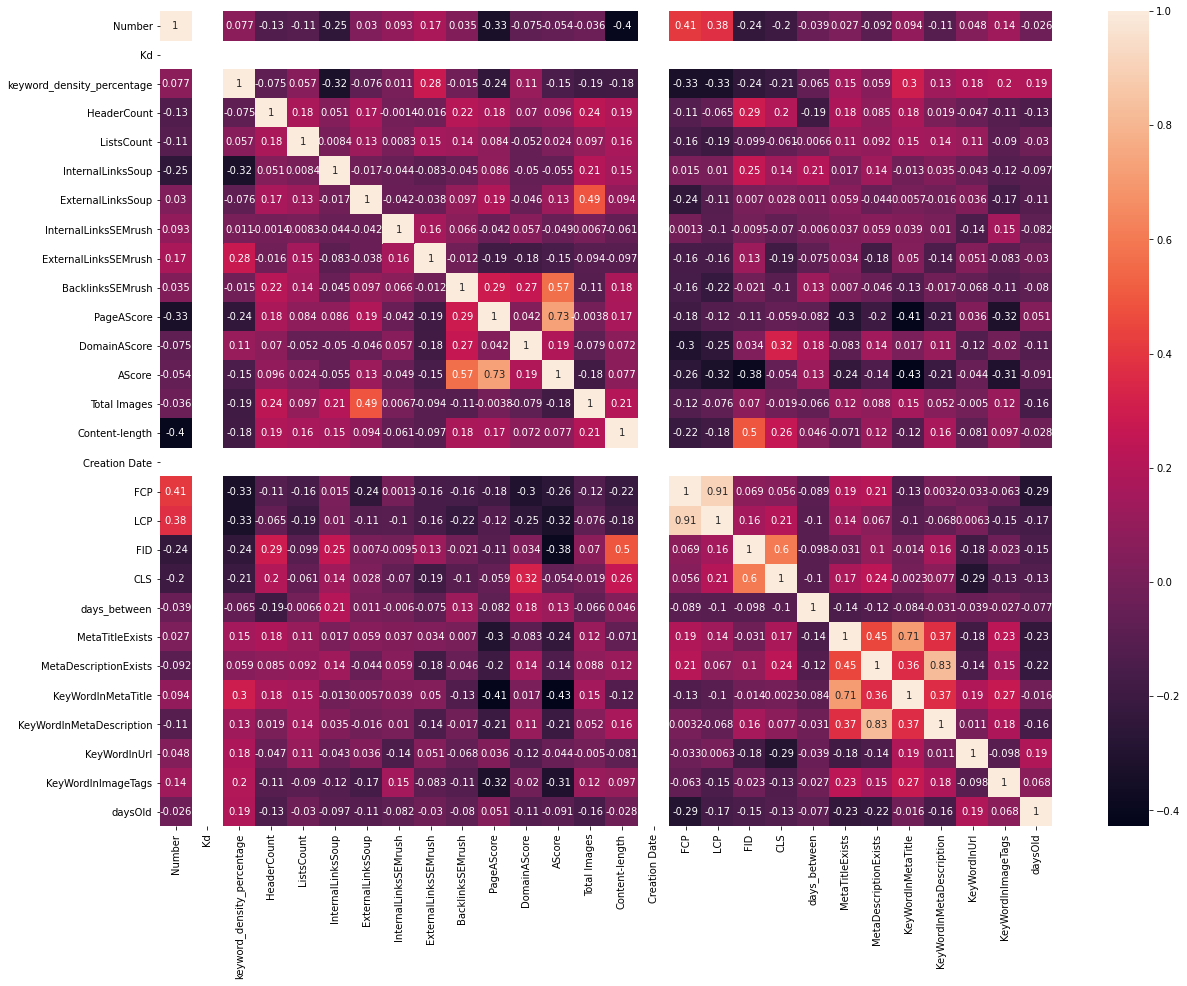

In [110]:
# Visualize the correlations with a sns heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(corrdata2, annot=True)

In [121]:
# Meervoudige regressie

model = ols("Number ~ FCP + LCP + KeyWordInMetaTitle + KeyWordInUrl + InternalLinksSoup", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Number   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2.116
Date:                Fri, 21 May 2021   Prob (F-statistic):             0.0929
Time:                        10:09:30   Log-Likelihood:                -156.88
No. Observations:                  34   AIC:                             325.8
Df Residuals:                      28   BIC:                             334.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.3048     14

# Number ~ LCP

In [118]:
model = ols("Number ~ LCP", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Number   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     5.494
Date:                Fri, 21 May 2021   Prob (F-statistic):             0.0253
Time:                        10:04:28   Log-Likelihood:                -164.58
No. Observations:                  35   AIC:                             333.2
Df Residuals:                      33   BIC:                             336.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8868      9.681      1.331      0.1

# Number ~ FCP

In [119]:
model = ols("Number ~ FCP", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Number   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     6.659
Date:                Fri, 21 May 2021   Prob (F-statistic):             0.0145
Time:                        10:04:50   Log-Likelihood:                -164.06
No. Observations:                  35   AIC:                             332.1
Df Residuals:                      33   BIC:                             335.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4896      8.119      1.908      0.0

De laadtijd is het belangrijkst. Als de website theoretisch gezien geen laadtijd heeft staat de website standaard op plek 13, wanneer de laadtijd met 0.0092 toeneemt, neemt de positie toe.

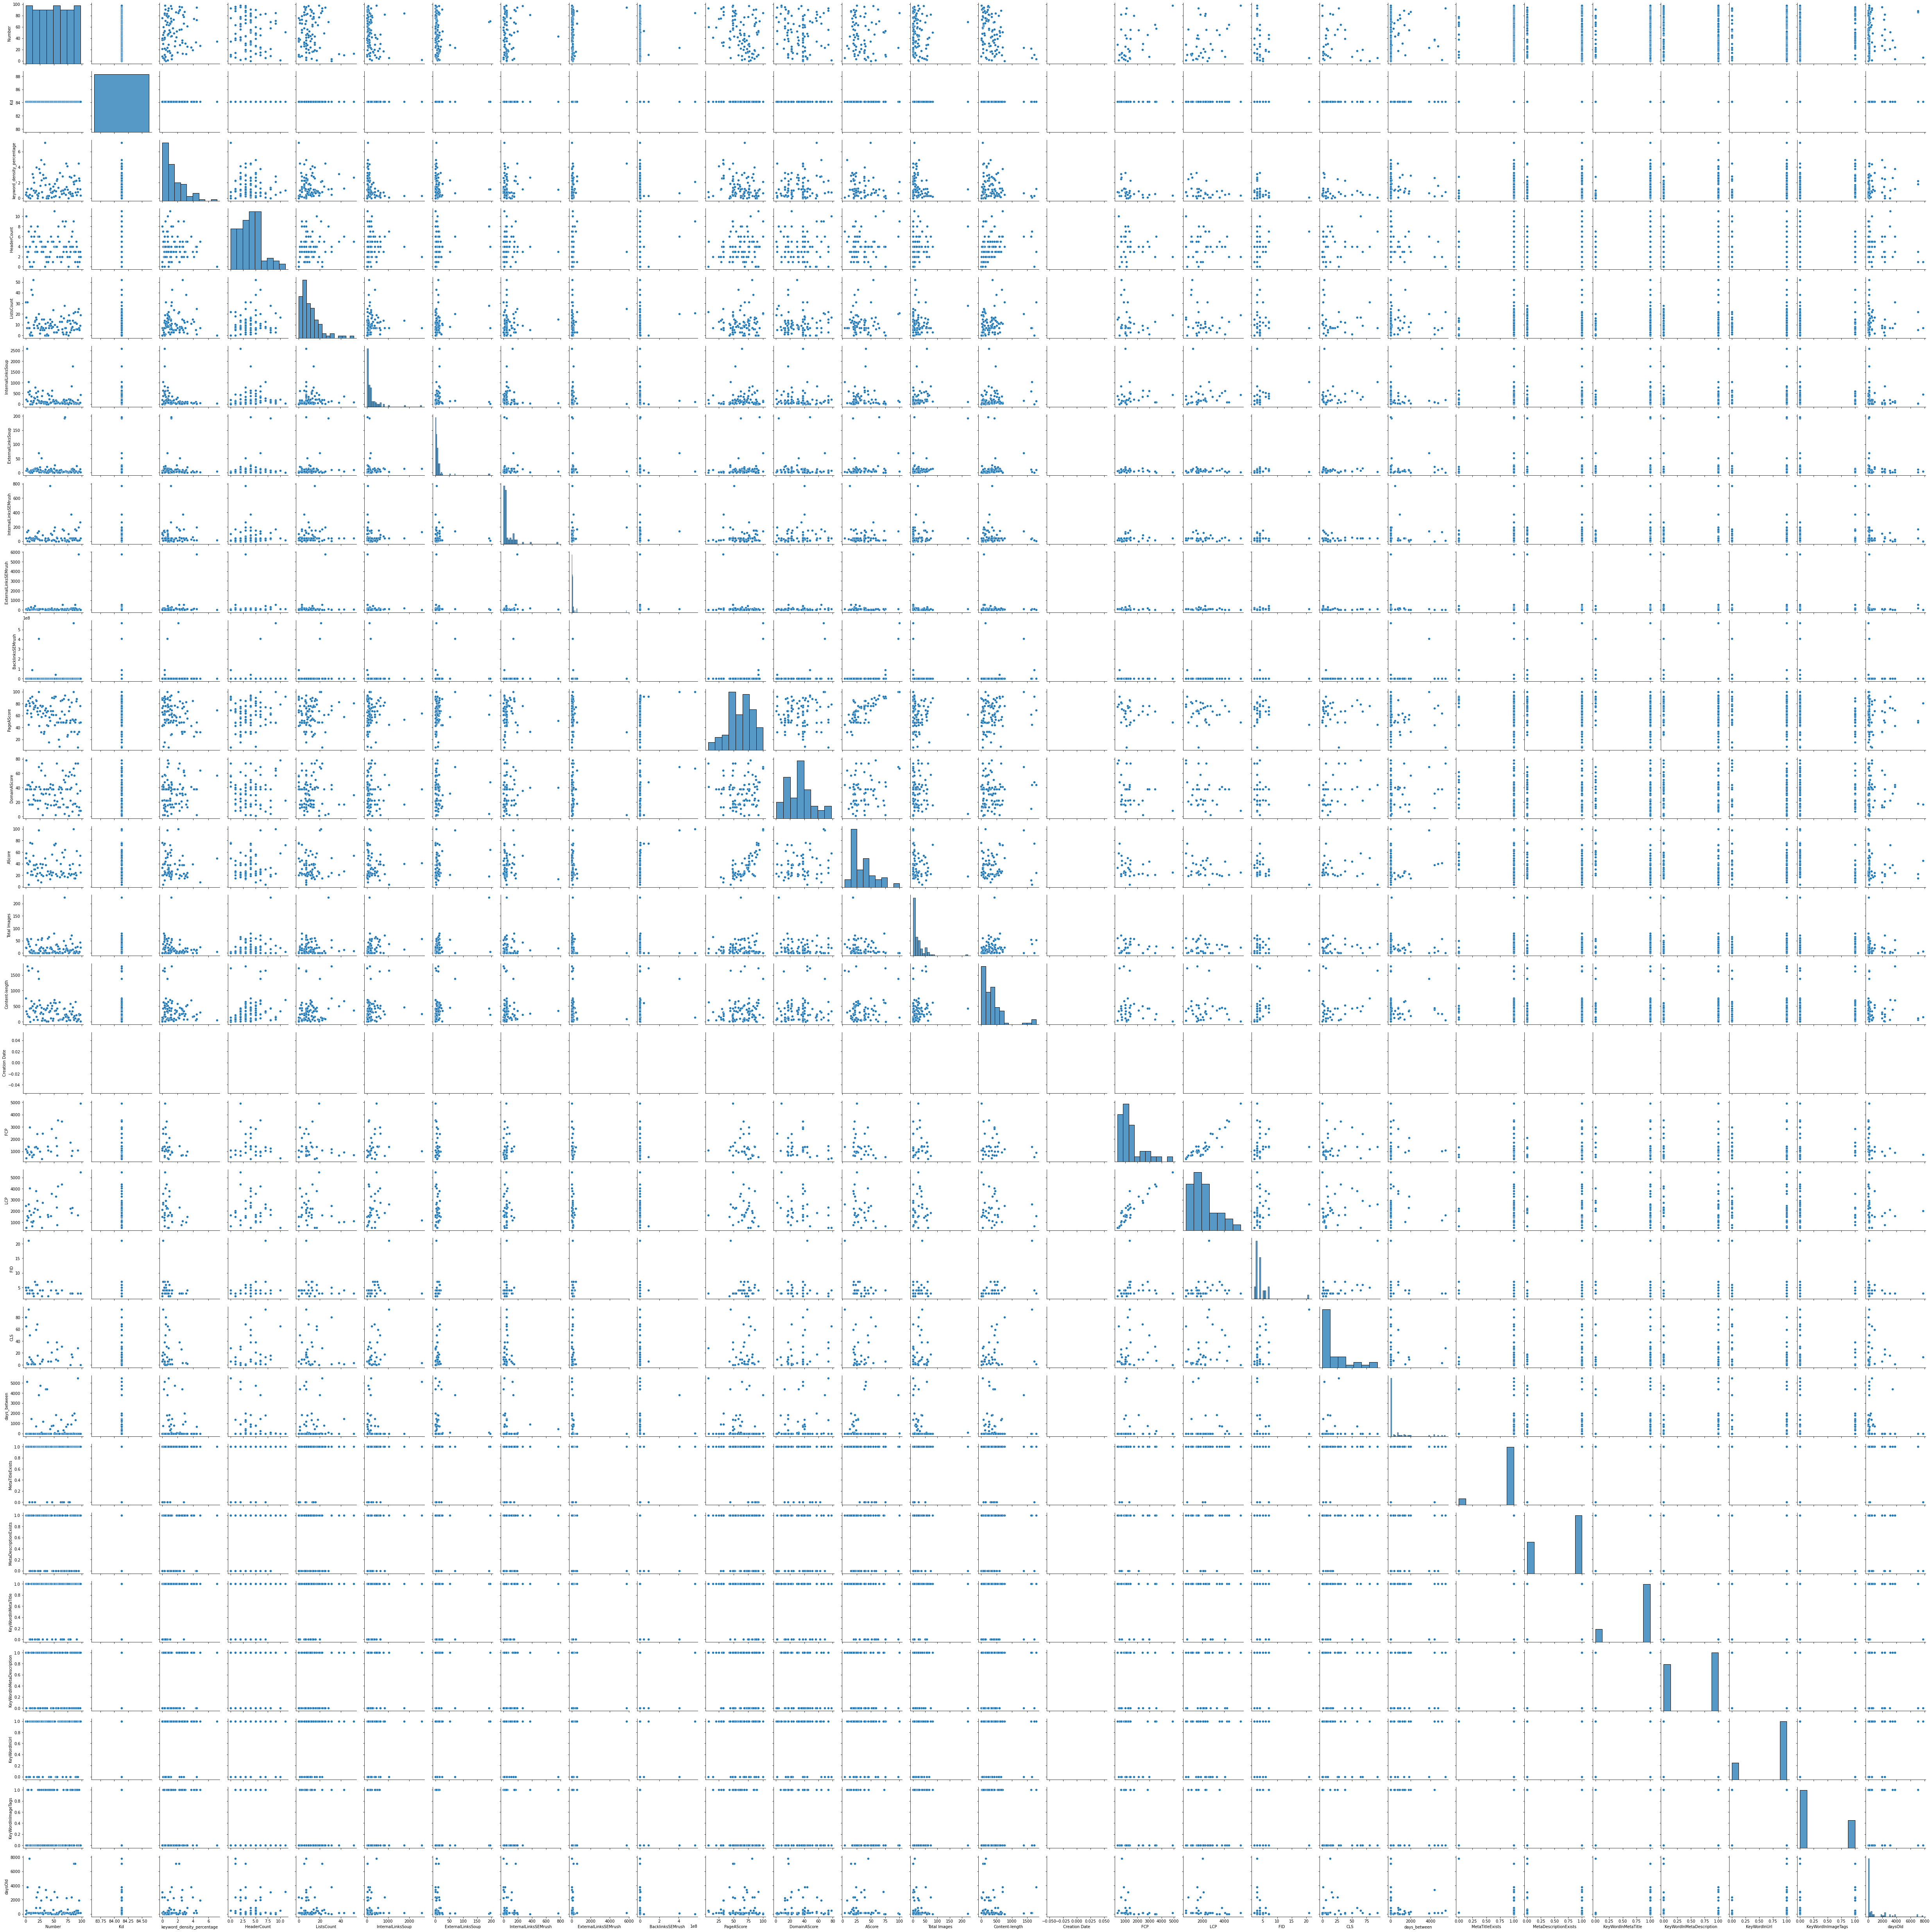

In [122]:
sns.pairplot(data=df)

# Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

def fit_decision_tree(param):
    #afhankelijke variabelen
    dep_var_2 = df2['Number']

    #onafhankelijke variabelen
    indep_var_2 = df2[param].fillna(0)
    indep_var_train, indep_var_test, dep_var_train, dep_var_test = train_test_split(indep_var_2[param], dep_var_2, test_size=0.3, random_state=10)
    
    #F1-score berekenen
    clf = DecisionTreeClassifier().fit(indep_var_train, dep_var_train)
    f1Score = f1_score(dep_var_test, clf.predict(indep_var_test), pos_label='above', average='micro')
    f1Score = str(f1Score)
    f1Score = "F1 score is: " + f1Score + " - Confusion matrix is:"
    
    #Confusion matrix berekenen
    #cm = pd.DataFrame(confusion_matrix(dep_var_test, clf.predict(indep_var_test)),
    #columns=['above', 'below'],
    #index=['above', 'below'])
    
    
    #result = "F1 score is: " + f1Score + "Confusion matrix is: " + cm
    
    return f1Score, clf
    
    

fit_decision_tree(['FCP'])

('F1 score is: 0.0 - Confusion matrix is:', DecisionTreeClassifier())

            FCP          LCP  Content-length  InternalLinksSoup
42  1477.628571  2162.228571             316              229.0
34  1477.628571  2162.228571              53               34.0
83  1050.000000  2298.000000             344              153.0
52  1477.628571  2162.228571             353               22.0
35  1477.628571  2162.228571             377               47.0


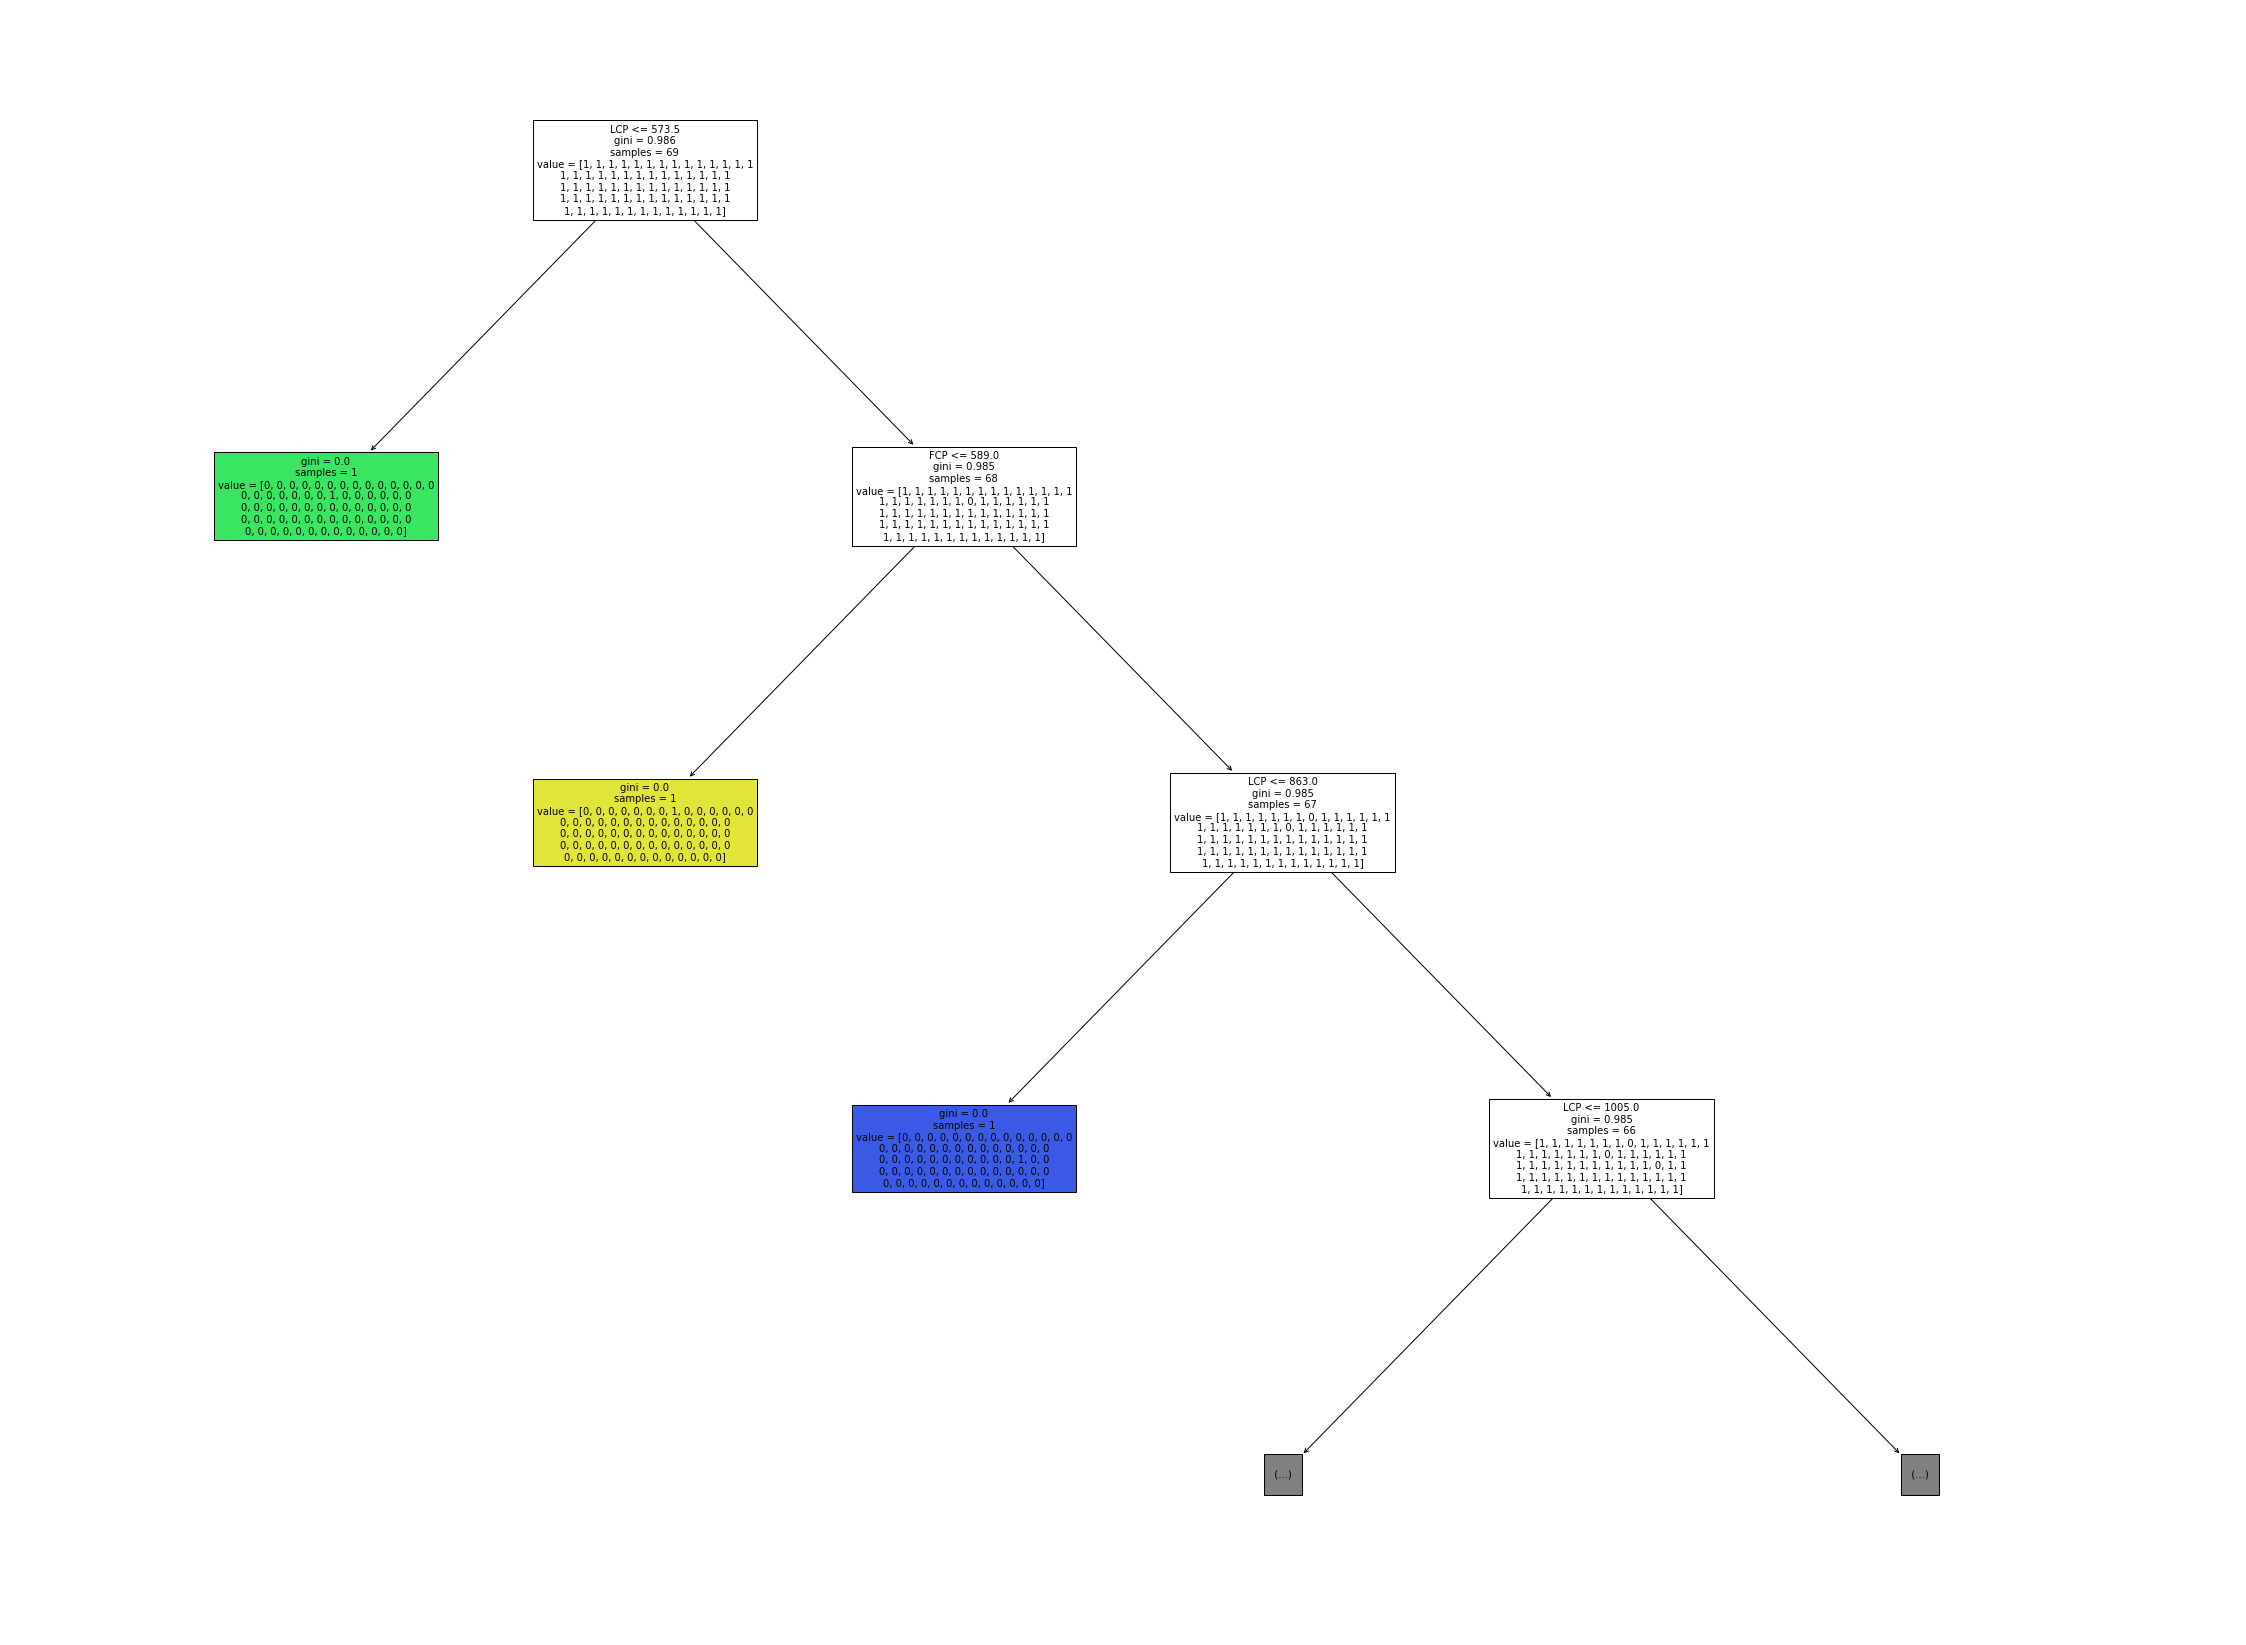

In [178]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

#afhankelijke variabelen
dep_var = df['Number']

#onafhankelijke variabelen
indep_var = df[['FCP', 'LCP','Content-length', 'InternalLinksSoup']].fillna(df2.mean())

indep_var_train, indep_var_test, dep_var_train, dep_var_test = train_test_split(indep_var, dep_var, test_size=0.3, random_state=10)
print(indep_var_train.head())

clf = DecisionTreeClassifier().fit(indep_var_train, dep_var_train)


plt.figure(figsize=(40,30))
boom = tree.plot_tree(clf, max_depth = 3, fontsize=10, filled=True, feature_names = ['FCP', 'LCP','Content-length', 'InternalLinksSoup']) 
# Hogere gini score wilt zeggen dat een variabel meer kan verklaren
# Des te roder het wordt des te meer keuzes binnen de data daarnaartoe gaan.

# Voorspelling

In [14]:
# [5 min] splits je dataset in twee delen: 70% training, 30% test gebruik random_state =84 
# en de volgende naamgeving voor de variabelen: indep_vars_train, indep_vars_test, mpg_train, mpg_test
from sklearn.model_selection import train_test_split


indep_vars_train, indep_vars_test, number_train, number_test = train_test_split(df['FCP'], df['Number'], test_size=0.3, random_state=84)

train_data = pd.concat([indep_vars_train, number_train], axis=1)
train_data.head()

,FCP,Number
80,1725.0,80.0
69,NaN,69.0
19,NaN,19.0
9,1000.0,9.0
93,1093.0,93.0


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 99 and the array at index 1 has size 30

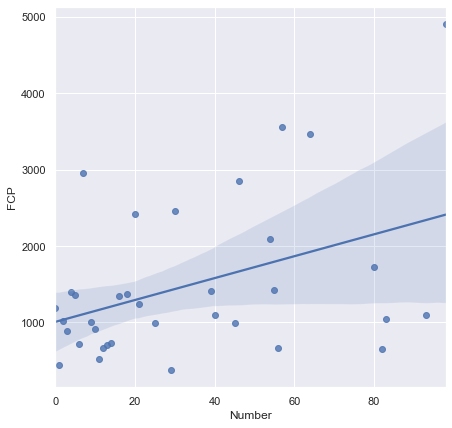

In [26]:
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(7, 7)})
sns.regplot(x="Number", y="FCP", data=df);
sns.regplot(x=df['Number'], y=predicted,scatter=False);

In [ ]:
print(predict_y.name)
predict_y = predict_y.rename('chemical_2')
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(7, 7)})
sns.regplot(x=X, y=Y, fit_reg=False, ax=ax,scatter_kws={"color": "green"});
sns.regplot(x=X, y=predict_y,scatter=False, ax=ax, scatter_kws={"color": "green"});

In [21]:
indep_vars_train

80    1725.0
69       NaN
19       NaN
9     1000.0
93    1093.0
       ...  
64    3463.0
78       NaN
56     660.0
89       NaN
42       NaN
Name: FCP, Length: 69, dtype: float64

In [22]:
model = ols("Number ~ FCP", data=train_data)
results = model.fit()
predicted=results.predict(indep_vars_test)
predicted

73          NaN
55    36.427077
79          NaN
1     24.999867
76          NaN
11    25.947261
32          NaN
8           NaN
6     28.239721
67          NaN
84          NaN
49          NaN
59          NaN
7     54.415867
35          NaN
65          NaN
87          NaN
25    31.456182
21    34.345149
91          NaN
88          NaN
75          NaN
27          NaN
60          NaN
4     36.204849
22          NaN
40    32.555627
14    28.309898
97          NaN
37          NaN
dtype: float64

In [ ]:
residuals = number_test - predicted
residual_data = pd.DataFrame({'number': number_test, 'residual': residuals})
print(residual_data)
residual_data.plot(x='number', y='residual', kind='scatter')

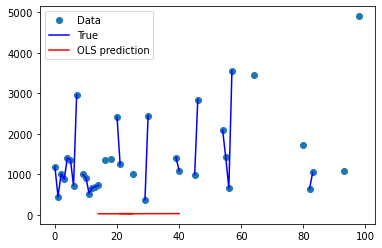

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df['Number'], df['FCP'], 'o', label="Data")
ax.plot(df['Number'], df['FCP'], 'b-', label="True")
ax.plot(number_test, predicted, 'r', label="OLS prediction")
ax.legend(loc="best");